In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
# display top 5 rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# display bottom 5 rows 
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# find shape of dataset
data.shape

(10000, 14)

In [6]:
print('Number of Rows:',data.shape[0])
print('Number of Columns:',data.shape[1])

Number of Rows: 10000
Number of Columns: 14


In [7]:
# get information about dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# get overall statistics about the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# dropping irrelevant features
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
# encoding categorical data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data=pd.get_dummies(data,drop_first=True)

In [14]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Exited', ylabel='count'>

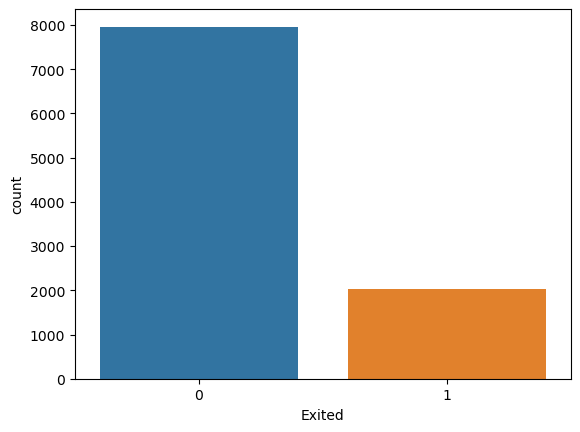

In [17]:
sns.countplot(x='Exited',data=data)

In [18]:
x=data.drop('Exited',axis=1)
y=data['Exited']

In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
 

In [22]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [23]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [25]:
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.808

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [29]:
precision_score(y_test,y_pred)

0.5891472868217055

In [30]:
recall_score(y_test,y_pred)

0.18673218673218672

In [31]:
f1_score(y_test,y_pred)

0.2835820895522388

In [32]:
# handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE

In [33]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [34]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=42)

In [36]:
# feature scaling
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred1=LR.predict(x_test)
accuracy_score(y_test,y_pred1)

0.5612052730696798

In [37]:
precision_score(y_test,y_pred1)

0.5415549597855228

In [38]:
recall_score(y_test,y_pred1)

0.6503541532517708

In [39]:
f1_score(y_test,y_pred1)

0.590988882387361

In [40]:
# SVC
from sklearn import svm
SVC=svm.SVC()

In [41]:
SVC.fit(x_train,y_train)

SVC()

In [42]:
y_pred2=SVC.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.5599497802887633

In [44]:
precision_score(y_test,y_pred2)

0.5353961556493202

In [45]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
KNN=KNeighborsClassifier()

In [47]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred3=KNN.predict(x_test)

In [49]:
accuracy_score(y_pred3,y_test)

0.6817325800376648

In [50]:
precision_score(y_test,y_pred3)

0.6445040214477212

In [51]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4=dt.predict(x_test)
accuracy_score(y_test,y_pred4)

NameError: name 'dt' is not defined

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier()

In [ ]:
RF.fit(x_train,y_train)

In [ ]:
y_pred5=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier()

In [ ]:
GBC.fit(x_train,y_train)

In [ ]:
y_pred6=gbc.predict(x_test)

In [ ]:
accuracy_score(y_pred6,y_test)

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                            accuracy_score(y_test,y_pred4),
                                                                            accuracy_score(y_test,y_pred5),
                                                                            accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [ ]:
# Save the model
x_res=sc.fit_transform(x_res)

In [ ]:
rf.fit(x_res,y_res)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

In [ ]:
model=joblib.load('churn_predict_model')

In [ ]:
data.columns

In [ ]:
model.predict([[619,42,2,0,0,0,0,101348.88,0,0,0]])